In [ ]:
Campaign for selling personal loans


This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of customers
who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this
base rapidly to bring in more loan business and in the process, earn more through the interest on
loans. In particular, the management wants to explore ways of converting its liability customers to
personal loan customers (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the
retail marketing department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.


The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer&#39;s relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among
these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

DataSet-Bank_Personal_Loan_Modelling.csv

Column Descrition - TheraBank_Column_Description.xlsx

1. Read the column description and ensure you understand each attribute well


2. Study the data distribution in each attribute, share your findings. (10 points)


3. Get the target column distribution. 


4. Split the data into training and test set in the ratio of 70:30 respectively


5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a
liability customer buying personal loans (30 points)


6. Print the confusion matrix for all the above models (10 points)


7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)

     

In [95]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
from sklearn import metrics
warnings.simplefilter("ignore")


In [12]:
Bpldf = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [7]:
Bpldf.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [4]:
Bpldf.shape

(5000, 14)

In [5]:
Bpldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
Bpldf.isnull().sum().sum()

0

In [7]:
Bpldf['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [17]:
Bpldf.Experience = np.abs(Bpldf.Experience)

In [21]:
Bpldf[Bpldf.Experience>=0].Experience.count()

5000

In [22]:
Bpldf[Bpldf.Experience<0].Experience.count()

0

In [197]:
Bpldf.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [222]:
Bpldf.loc[Bpldf['ZIP Code'] == 9307,['ZIP Code']] = 90007


In [225]:
Bpldf[Bpldf['ZIP Code'] == 90007]


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
145,146,59,35,124,90007,1,7.4,1,0,0,0,0,0,1
384,385,51,25,21,90007,4,0.6,3,0,0,0,0,1,1
472,473,43,19,31,90007,4,0.3,1,156,0,0,0,1,0
2729,2730,58,34,63,90007,4,1.5,1,0,0,0,0,1,0
2867,2868,59,33,110,90007,3,4.4,1,264,0,0,0,1,0
3195,3196,55,29,35,90007,3,1.4,1,0,0,0,0,0,0
4849,4850,49,25,65,90007,2,1.0,3,0,0,0,0,1,1


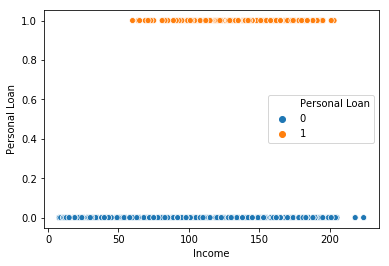

In [240]:
sns.scatterplot(Bpldf['Income'],Bpldf['Personal Loan'], hue = Bpldf['Personal Loan'])

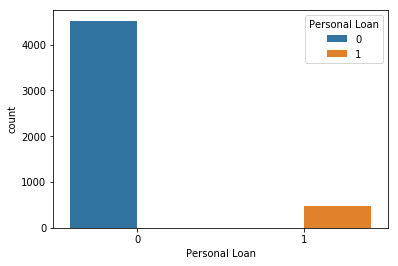

In [226]:
#3. Get the target column distribution.
#Solution1
sns.countplot(Bpldf['Personal Loan'],hue=Bpldf['Personal Loan'])

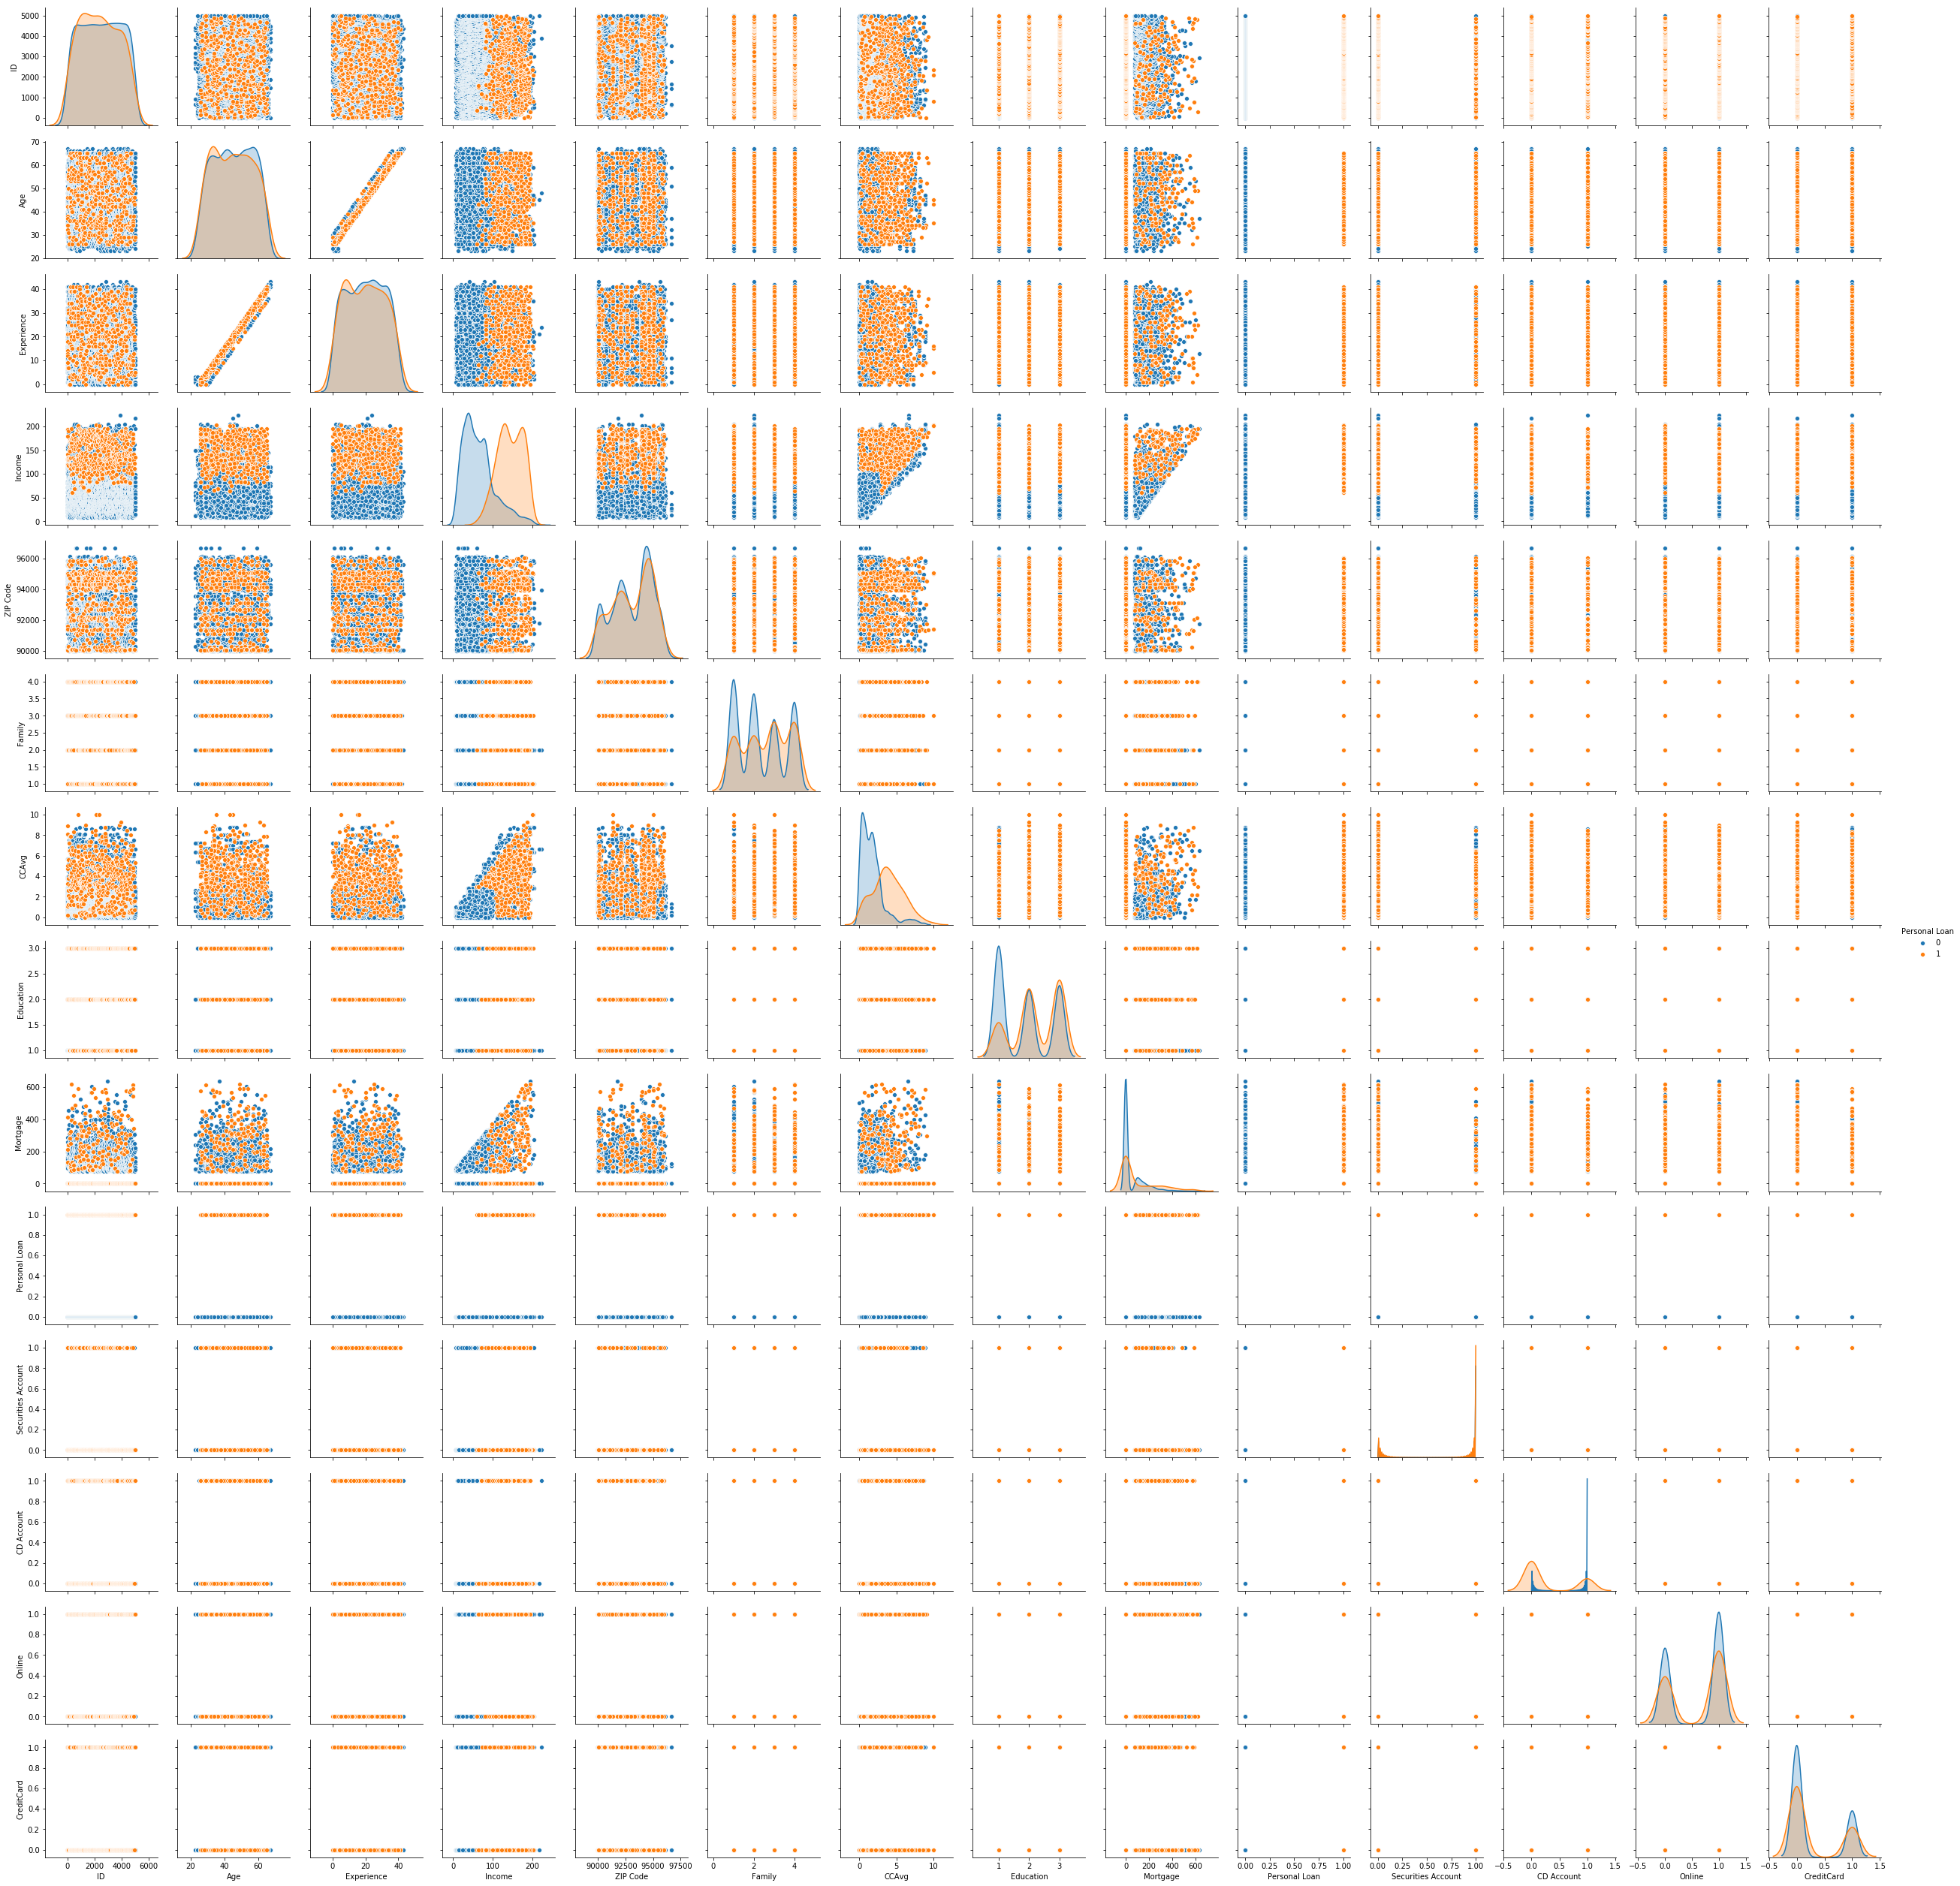

In [231]:
#3. Get the target column distribution. 
#Solution 2
sns.pairplot(Bpldf,hue = "Personal Loan")

2. Study the data distribution in each attribute, share your findings.

My findings: 

1.  there are 14 columns. 
2.  Overlapping is more interms of age, experience,zip code, family, education, mortagage, netbanking and credit card. 
3.   Income and CCAVg looks to have lesser overlapping.
4.  Muliple process in Income category. Right Skewness is observed for people who dont take personal loan.
5.  Personal loan says the customer accepted loan or not.  Hence this becomes the target variable.
6.  Around 52 records have experience as negative.  
7.  One of the Zip code is incorrect. Probably 90007 was wrongly interpretted as 9307.
8.  Annual Income >60 $ and <=205 are more likely to take personal loan.
9.  Person having higher CCAvg and annual income are likely to take a personal loan.
10.  Age the age and experience increases, chance of availing personal loan is higher.
11.  Personal loan accepted in the past is considered as 1 (Yes)  and 0 (No) 


In [ ]:
#splitting the records into X and Y.  Since Y is inbetween X's, we use below approach. 

X = Bpldf.iloc[:,:9]
Y = Bpldf.iloc[:,9]

In [37]:
X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [36]:
X[['Securities Account','CD Account','Online','CreditCard']] = Bpldf[['Securities Account','CD Account','Online','CreditCard']]

In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [38]:
Xcopy = X.copy()

In [39]:
Ycopy = y.copy()

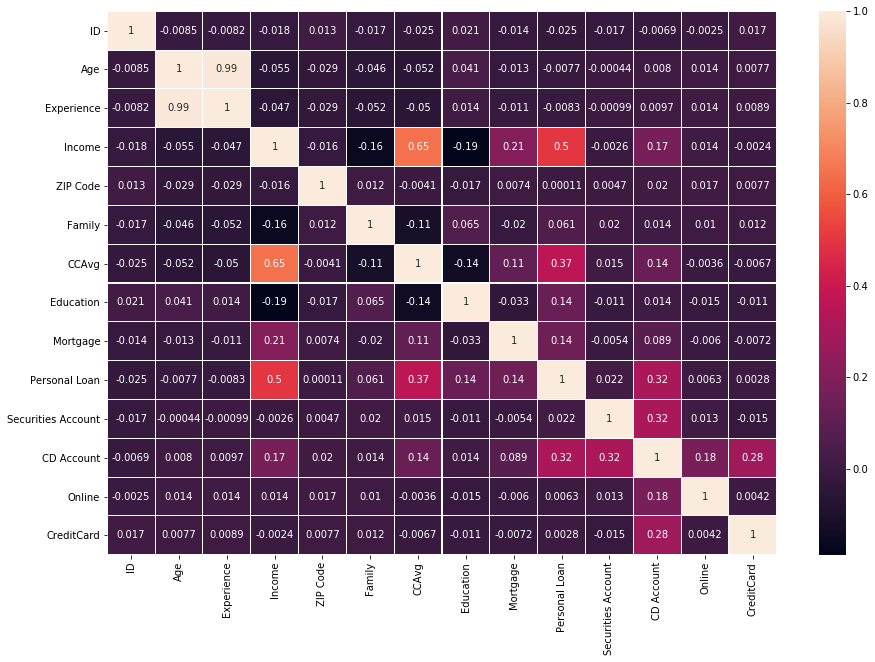

In [195]:
plt.figure(figsize = (15,10))
sns.heatmap(Bpldf.corr(),annot= True,linewidth = 0.01)
plt.show()

In [260]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y, test_size = 0.3,random_state = 10001)
Xtrain_s = preprocessing.scale(Xtrain)
Xtest_s = preprocessing.scale(Xtest)

In [261]:
#Logistic Regression
LRmodel = LogisticRegression()
LRmodel.fit(Xtrain_s, Ytrain)
ypredict = LRmodel.predict(Xtest_s)
modeltest_score = LRmodel.score(Xtest_s,Ytest)
print("Trainingscore",LRmodel.score(Xtrain_s,Ytrain))
print("Testscore",modeltest_score)
print(metrics.confusion_matrix(Ytest,ypredict))
print(metrics.classification_report(Ytest, ypredict))

Trainingscore 0.9502857142857143
Testscore 0.95
[[1347   22]
 [  53   78]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1369
           1       0.78      0.60      0.68       131

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.87      0.79      0.82      1500
weighted avg       0.95      0.95      0.95      1500



In [227]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y, test_size = 0.3,random_state = 3)
Xtrain_s = preprocessing.scale(Xtrain)
Xtest_s = preprocessing.scale(Xtest)
#Applying Knn
Kmodel = KNeighborsClassifier(n_neighbors = 3)
yKpredict = Kmodel.fit(Xtrain_s,Ytrain).predict(Xtest_s)
print("KNN Model Train Score", Kmodel.score(Xtrain_s,Ytrain))
print("KNN Model Test Score", Kmodel.score(Xtest_s,Ytest))
print(metrics.confusion_matrix(Ytest,yKpredict))
print(metrics.classification_report(Ytest, yKpredict))

KNN Model Train Score 0.9765714285714285
KNN Model Test Score 0.954
[[1343    6]
 [  63   88]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.97      1349
           1       0.94      0.58      0.72       151

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.95      0.79      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [228]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y, test_size = 0.3,random_state = 10)
Xtrain_s = preprocessing.scale(Xtrain)
Xtest_s = preprocessing.scale(Xtest)
#Applying Naive Bayes
NBmodel = GaussianNB()
yNBpredict = NBmodel.fit(Xtrain_s,Ytrain).predict(Xtest_s)
print("Naive Bayes Score",NBmodel.score(Xtrain_s,Ytrain))
print("Naive Bayes Score",NBmodel.score(Xtest_s,Ytest))
print(metrics.confusion_matrix(Ytest,yNBpredict))
print(metrics.classification_report(Ytest, yNBpredict))

Naive Bayes Score 0.884
Naive Bayes Score 0.8833333333333333
[[1245  115]
 [  60   80]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1360
           1       0.41      0.57      0.48       140

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.68      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



In [229]:
from sklearn.preprocessing import StandardScaler 
k_neigh = np.arange(1,20,2)
print(k_neigh)
train_accuracy_plot = np.empty(len(k_neigh))
test_accuracy_plot = np.empty(len(k_neigh))
for i,k in enumerate(k_neigh):
    train_val = []
    test_val = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=j)
        sc=StandardScaler()
        stdX_train = sc.fit_transform(X_train)
        stdX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(stdX_train,y_train)
        train_val.append(knn.score(stdX_train,y_train))
        test_val.append(knn.score(stdX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train_val)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test_val)
    print("K = ", k,"Training Accuracy" , train_accuracy_plot[i])    
    print("K= ",k,"Testdata Accuracy",  test_accuracy_plot[i])

[ 1  3  5  7  9 11 13 15 17 19]
K =  1 Training Accuracy 1.0
K=  1 Testdata Accuracy 0.9473
K =  3 Training Accuracy 0.9731285714285715
K=  3 Testdata Accuracy 0.9523999999999999
K =  5 Training Accuracy 0.9638
K=  5 Testdata Accuracy 0.9513333333333334
K =  7 Training Accuracy 0.958585714285714
K=  7 Testdata Accuracy 0.9489000000000001
K =  9 Training Accuracy 0.9556142857142855
K=  9 Testdata Accuracy 0.9473999999999998
K =  11 Training Accuracy 0.9527857142857143
K=  11 Testdata Accuracy 0.9459666666666665
K =  13 Training Accuracy 0.9506999999999998
K=  13 Testdata Accuracy 0.944
K =  15 Training Accuracy 0.9484000000000001
K=  15 Testdata Accuracy 0.9434666666666667
K =  17 Training Accuracy 0.9468285714285717
K=  17 Testdata Accuracy 0.9417999999999997
K =  19 Training Accuracy 0.9452857142857143
K=  19 Testdata Accuracy 0.9407333333333332


In [ ]:
Conclusion:  
    Knn algorithm looks to be comparatively better than Logistic Regression and Naive Bayes Algorithm. 
    Knn had performed better in training than in test.  However the score is not having high variance.  
    Logistic regression score 95% in both training and test dataset. however it had a weak F1 score in "Yes" scenario than knn.     
    Knn has better precision and recall that indicates that knn model was able to predict prospects with less error.
    In other words, the harmonic mean of precision and recall (F1 Score) is better than LR and Naive Bayes.
    In case, if bank is not worried about the F1 score, LR can also be choosen a model for prediction.  